## Load libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from CCB_Calculator.CCB_Calculator import CCB_Calculator

## Set working diractory

In [5]:
# os.chdir('/content/drive/MyDrive/frenkel')
cwd = os.getcwd()
cwd

'c:\\Users\\Hassen\\Desktop\\github\\CCB_Calculator\\CCB_Calculator\\test'

## Load Data

In [6]:
df = pd.read_csv(cwd + '\\data.csv',index_col='Date',parse_dates=True)

## Inistantiate CCB_Calculator

In [7]:
benchmarck_date = '2002-12-01'
basket= [	'USD'	,'EUR',	'OIL'	]
calculator = CCB_Calculator(df,basket,benchmarck_date)

## Banchmark CCB (Frankel weights)

In [8]:
benchmarck_weights = [1/3,1/3,1/3]
df['CCBD_F_f'] = calculator.frenkel_simulation(benchmarck_weights,fix = True)
df['CCBD_F_v'] = calculator.frenkel_simulation(benchmarck_weights,fix = False)

## Optimal CCB


In [9]:
combinations = calculator.get_combinations()
optimal_weights_fix, ccbd_f = calculator.get_optimal_weights(combinations, fix=True)
optimal_weights_var, ccbd_v = calculator.get_optimal_weights(combinations, fix=False)
print('The optimal weights for CCBD fixed are :', optimal_weights_fix)
print('The optimal weights for CCBD float are :', optimal_weights_var)
df['CCBD_f_optimal']=ccbd_f
df['CCBD_v_optimal']=ccbd_v

The optimal weights for CCBD fixed are : (0.1, 0.7000000000000001, 0.2)
The optimal weights for CCBD float are : (0.2, 0.0, 0.8)


## Plot the results

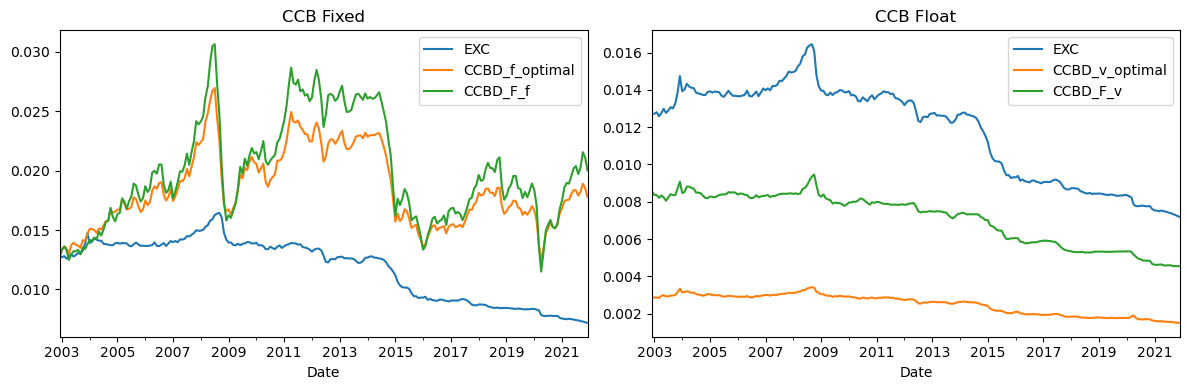

In [10]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))

# Plot the first subplot (line plot)
df[['EXC','CCBD_f_optimal','CCBD_F_f']].plot(ax =ax1)
# ax1.plot(x, y1, color='blue')
ax1.set_title('CCB Fixed')


# Plot the second subplot (bar plot)
df[['EXC','CCBD_v_optimal','CCBD_F_v']].plot(ax =ax2)
ax2.set_title('CCB Float')

# Adjust spacing between subplots
plt.tight_layout()

# Show the graph
plt.show()